#### Overview
* groupby: sum, mean, median, min, max, size, count

#### Import Libraries

In [30]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#### Fetching Data

##### Seoul SGG Data

In [2]:
SGG_SHP_PATH = os.path.join(
    os.getcwd(), '89_data', 'shp', 'LARD_ADM_SECT_SGG_11.shp'
)

seoul_sgg_gdf = gpd.read_file(SGG_SHP_PATH, encoding='cp949')
seoul_sgg_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_SECT_C  25 non-null     object  
 1   SGG_NM      25 non-null     object  
 2   SGG_OID     25 non-null     int64   
 3   COL_ADM_SE  25 non-null     object  
 4   GID         25 non-null     int64   
 5   geometry    25 non-null     geometry
dtypes: geometry(1), int64(2), object(3)
memory usage: 1.3+ KB


In [3]:
seoul_sgg_gdf.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


##### Commercial Area Polygon Data in Seoul

In [4]:
SEOUL_CAP_SHP_PATH = os.path.join(
    os.getcwd(), '89_data', 'shp', 'TBGIS_TRDAR_RELM.shp'
)

seoul_cap_gdf = gpd.read_file(SEOUL_CAP_SHP_PATH)
seoul_cap_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STDR_YM_CD  1671 non-null   object  
 1   TRDAR_SE_C  1671 non-null   object  
 2   TRDAR_SE_1  1671 non-null   object  
 3   TRDAR_NO    1671 non-null   object  
 4   TRDAR_NM    1671 non-null   object  
 5   XCNTS_VALU  1671 non-null   float64 
 6   YDNTS_VALU  1671 non-null   float64 
 7   SIGNGU_CD   1671 non-null   object  
 8   ADSTRD_CD   1671 non-null   object  
 9   geometry    1671 non-null   geometry
dtypes: float64(2), geometry(1), object(7)
memory usage: 130.7+ KB


In [5]:
seoul_sgg_gdf.shape

(25, 6)

In [6]:
seoul_cap_gdf.SIGNGU_CD.unique().size

25

In [7]:
seoul_cap_gdf.head()

,STDR_YM_CD,TRDAR_SE_C,TRDAR_SE_1,TRDAR_NO,TRDAR_NM,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,ADSTRD_CD,geometry
0,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934.0,438813.0,11545,11545710,"POLYGON ((192008.560 438553.170, 191987.740 43..."
1,202112,A,골목상권,2110427,노원 을지대학교병원,206265.0,459431.0,11350,11350611,"POLYGON ((206296.880 459321.710, 206238.710 45..."
2,202112,A,골목상권,2110755,동일여자고등학교,192300.0,439070.0,11545,11545680,"POLYGON ((192443.040 439028.230, 192507.940 43..."
3,202112,A,골목상권,2110739,시흥3동 우편취급국,191289.0,438014.0,11545,11545690,"POLYGON ((191390.840 437878.790, 191371.650 43..."
4,202112,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."


#### Count of Regional Information by District

In [11]:
sgg_cnt_df = seoul_cap_gdf.groupby('SIGNGU_CD').size().reset_index(name='count')
sgg_cnt_df.head()

,SIGNGU_CD,count
0,11110,77
1,11140,80
2,11170,57
3,11200,55
4,11215,62


In [15]:
seoul_cnt_gdf = pd.merge(
    seoul_sgg_gdf, sgg_cnt_df, 
    left_on='COL_ADM_SE', right_on='SIGNGU_CD',
    how='left'
)
seoul_cnt_gdf.drop(columns=['SIGNGU_CD'], inplace=True)
seoul_cnt_gdf.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,count
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",60
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",70
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",103
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",78
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",74


#### Display

##### explore()

In [17]:
seoul_cnt_gdf.explore(
    column='count', 
    tiles='http://basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 
    attr='Carto'
)

#### Sum of Commercial Area Sizes by District

In [20]:
seoul_cap_gdf['area'] = seoul_cap_gdf['geometry'].area

In [21]:
sgg_area_sum_df = \
    seoul_cap_gdf.groupby('SIGNGU_CD')['area'].sum().reset_index(name='area_sum')

In [22]:
sgg_area_sum_df.head()

,SIGNGU_CD,area_sum
0,11110,8.147214e+06
1,11140,7.501028e+06
2,11170,7.009181e+06
3,11200,4.772992e+06
4,11215,5.621586e+06


In [24]:
# 지수형태의 숫자를 일반 숫자로 표시
pd.set_option('float_format', '{:f}'.format)

In [25]:
sgg_area_sum_df.head()

,SIGNGU_CD,area_sum
0,11110,8147214.240040
1,11140,7501028.444818
2,11170,7009180.674025
3,11200,4772991.811550
4,11215,5621586.124350


In [26]:
seoul_area_gdf = pd.merge(
    seoul_cnt_gdf, sgg_area_sum_df,
    left_on='COL_ADM_SE', right_on='SIGNGU_CD',
    how='left'
)
seoul_area_gdf.drop(columns=['SIGNGU_CD'], inplace=True)
seoul_area_gdf.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,count,area_sum
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",60,5776250.317800
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",70,11096588.637169
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",103,12712835.636572
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",78,9202756.694950
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",74,6075964.656650


In [27]:
seoul_area_gdf.explore(
    column='area_sum', 
    tiles='http://basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 
    attr='google'
)

#### Sort
* 순위(최고/최상) 판단에 좋음
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [29]:
seoul_area_gdf.sort_values('area_sum', ascending=False, inplace=True)
seoul_area_gdf.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,count,area_sum
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",103,12712835.636572
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",70,11096588.637169
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",78,9202756.694950
24,11110,종로구,353,11110,151,"POLYGON ((953559.701 1959304.587, 953628.607 1...",77,8147214.240040
9,11500,강서구,65,11500,136,"MULTIPOLYGON (((935035.249 1950923.294, 935041...",70,8142932.678850


#### Display

In [33]:
# 한글처리
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [35]:
# 구 이름 앞에 '서울시'가 포함된 구 이름이 있어서, '서울시'를 지움
seoul_area_gdf['SGG_NM'] = seoul_area_gdf['SGG_NM'].apply(lambda x: x.replace('서울시',''))

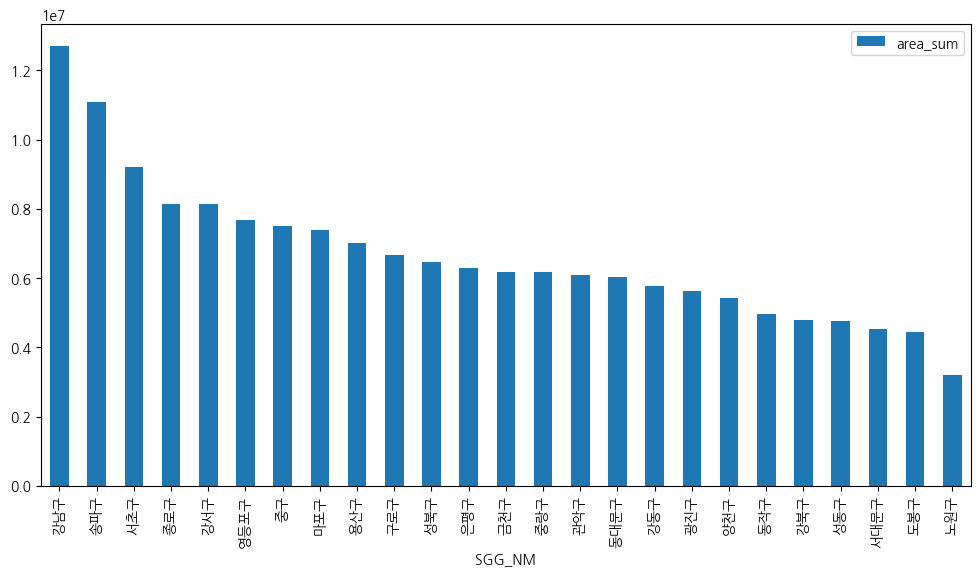

In [36]:
seoul_area_gdf.plot.bar(x='SGG_NM', y='area_sum', figsize=(12,6))
plt.show()